In [1]:
import nbimporter
%run ms_functions.ipynb

ERROR:root:File `'readin.ipynb.py'` not found.


In [2]:
file = "data/proteinGroups_MS3_simplified.txt"
msdata = readin(file)

### Finding Technical Replicates

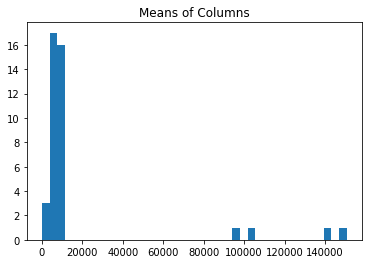

Reporter intensity corrected 0 MS3_1      8756.701218
Reporter intensity corrected 1 MS3_1      8242.912746
Reporter intensity corrected 2 MS3_1      8045.347016
Reporter intensity corrected 3 MS3_1      8175.134893
Reporter intensity corrected 4 MS3_1      8716.591123
Reporter intensity corrected 5 MS3_1      8854.583496
Reporter intensity corrected 6 MS3_1      8353.158014
Reporter intensity corrected 7 MS3_1       253.831929
Reporter intensity corrected 8 MS3_1      8069.454537
Reporter intensity corrected 9 MS3_1    150566.664798
Reporter intensity corrected 0 MS3_2      6781.660362
Reporter intensity corrected 1 MS3_2      6500.994743
Reporter intensity corrected 2 MS3_2      6247.221494
Reporter intensity corrected 3 MS3_2      6327.837091
Reporter intensity corrected 4 MS3_2      6718.135070
Reporter intensity corrected 5 MS3_2      6534.780408
Reporter intensity corrected 6 MS3_2      6170.567332
Reporter intensity corrected 7 MS3_2       225.537954
Reporter intensity corrected

In [3]:
show_by_columns(msdata)

In [4]:
#print("The following measure differences between columns. Technical replicates should be lowest.")
#dif(msdata)

In [5]:
neg_col = 7
boost_col = 9
technical_replicates = {"Cell Line 1":[0,1,2],"Cell Line 2":[3,4,5],"Cell Line 3":[6,8]}

### Evaluating Negative Control

In [6]:
samples = by_sample(msdata, technical_replicates)
neg_cont = msdata.iloc[:,neg_col]
boost = msdata.iloc[:,boost_col]
plot_title = "Neg Control vs Sample"

In [7]:
neg_data = eval_neg_cont(file, neg_col)
for i in neg_data: print("{0}: {1}".format(i,neg_data[i]))

ave_zero_raw: 65.40237715877437
stdev_zero_raw: 224.63347276660156
min_threshold_raw: 290.03584992537594
log_ave_zero_raw: 4.180558605796072
log_stdev_zero_raw: 5.414470063998818
log_min_threshold_raw: 5.670004535772475
ave_zero_log: 1.2406232479583161
stdev_zero_log: 2.212409174372133


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


In [8]:
thrs = n_thresholds(neg_cont, percents=[50.0,75.0,90.0,95.0,99.0])
thrs = thrs['with_zeros']

50.0% threshold: 0.0
75.0% threshold: 4.2969
90.0% threshold: 190.83
95.0% threshold: 350.74
99.0% threshold: 987.14

Ignoring Zeros: 
50.0% threshold: 148.37
75.0% threshold: 272.9
90.0% threshold: 564.33
95.0% threshold: 847.72
99.0% threshold: 1738.7


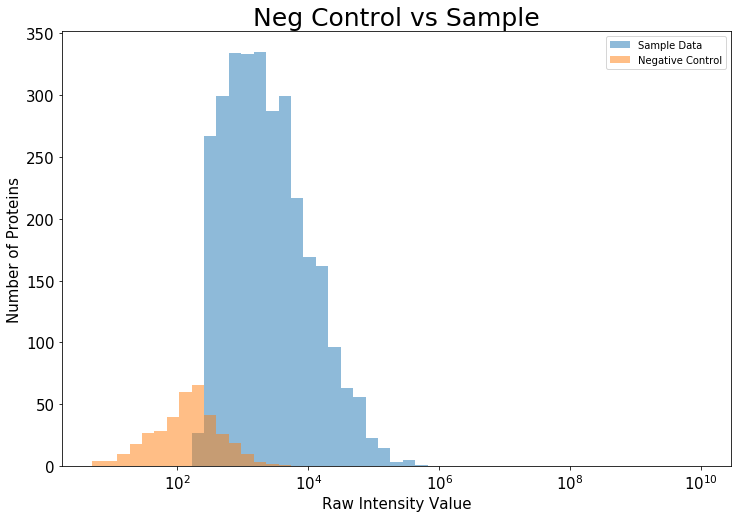

In [9]:
graph_neg_vs_samples(samples, neg_cont, title=plot_title)#, threshold=thrs[95])

25.8% control & 100.0% sample are above 0.0
25.0% control & 100.0% sample are above 4.2969
10.0% control & 100.0% sample are above 190.83
5.0% control & 92.7% sample are above 350.74
1.0% control & 68.0% sample are above 987.14


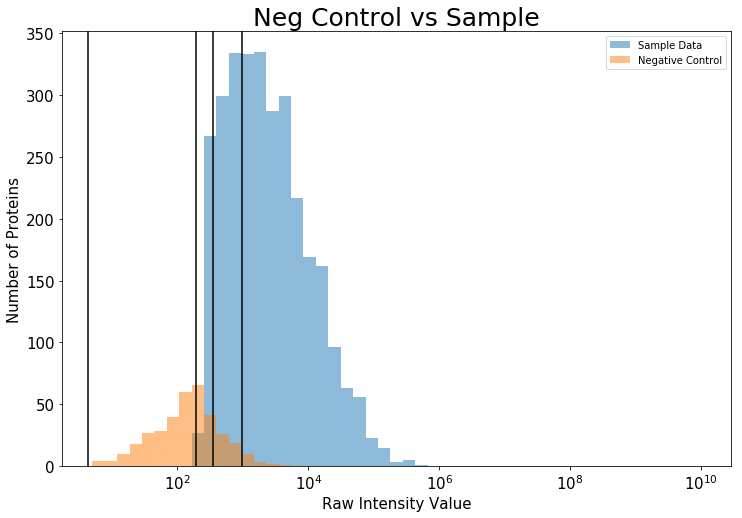

In [10]:
graph_neg_vs_samples(samples, neg_cont, title=plot_title, threshold_list = thrs.values())

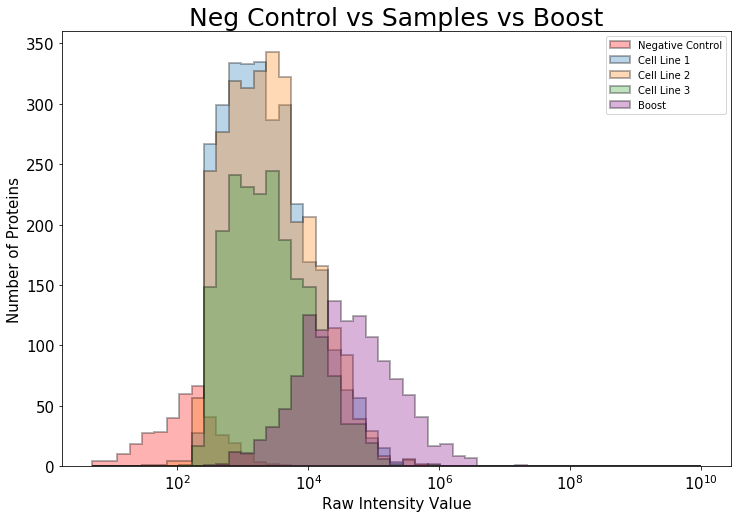

Non-zeros in Neg. Control:	25.77%	(370 of 1436)
Non-zeros in Cell Line 1:	69.43%	(2991 of 4308)
Non-zeros in Cell Line 2:	71.40%	(3076 of 4308)
Non-zeros in Cell Line 3:	72.18%	(2073 of 2872)
Non-zeros in boost:		86.21%	(1238 of 1436)


In [11]:
graphed_types(samples, neg_cont, boost)#, sample_percent = 15)#threshold=(neg_data['ave_zero_raw']))
zeros_by_type(samples, neg_cont, boost)

### Get Fold Change Threshold by Standard Deviations

In [12]:
fold_change_threshold = calc_fold_threshold(msdata, technical_replicates)
print (fold_change_threshold)

1.2253377959588447


In [13]:
msdata_log = readin_log(file)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


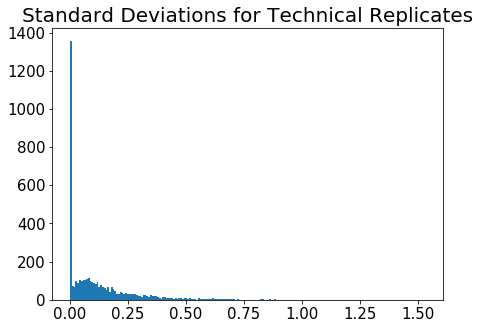

Including Zeros: 
95% threshold:  0.4347730803495055
99% threshold:  0.6780813582540242

Ignoring Zeros: 
95% threshold:  0.5024006729880437
99% threshold:  0.7148694367203182


0.5024006729880437

In [14]:
msdata_log = readin_log(file)
stdevs = get_tech_st_devs(msdata_log, technical_replicates)
plt.rc('axes', titlesize=20)
fig = plt.figure(figsize=(7,5))
plt.hist([x[2] for x in stdevs], bins=200)
plt.title("Standard Deviations for Technical Replicates")
plt.show()
get_thresholds([x[2] for x in stdevs])

### Volcano Plots

<Figure size 432x288 with 0 Axes>

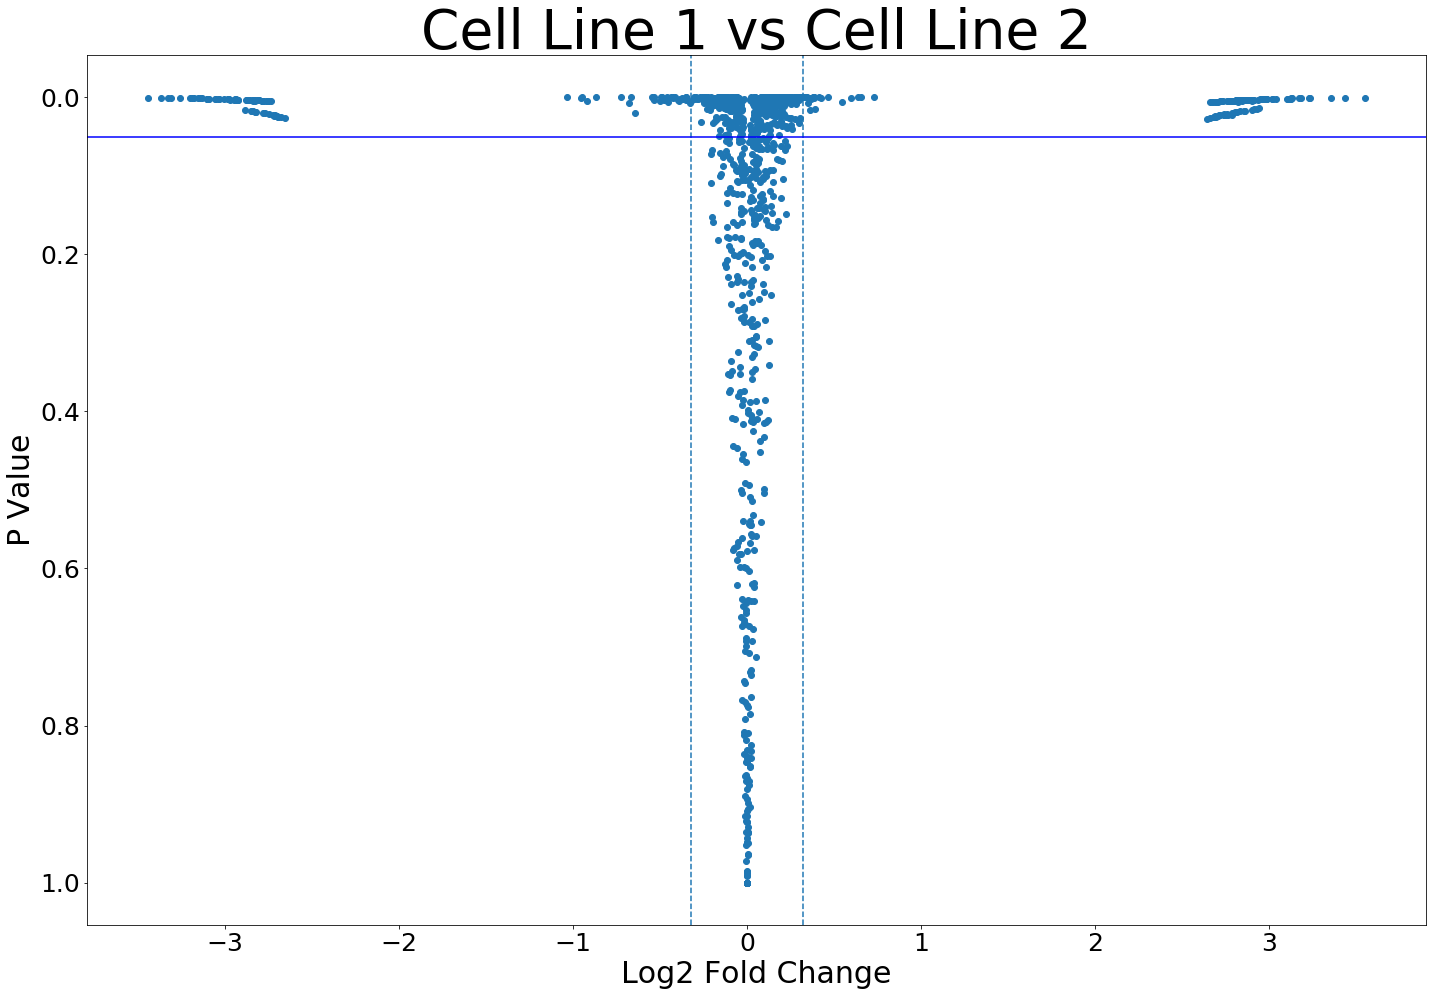

Using a 1.250 fold change threshold
229 proteins change significantly, out of 1436 (15.95%)
124 proteins are upregulated, out of 1436 (8.64%)
105 proteins are downregulated, out of 1436 (7.31%)



<Figure size 432x288 with 0 Axes>

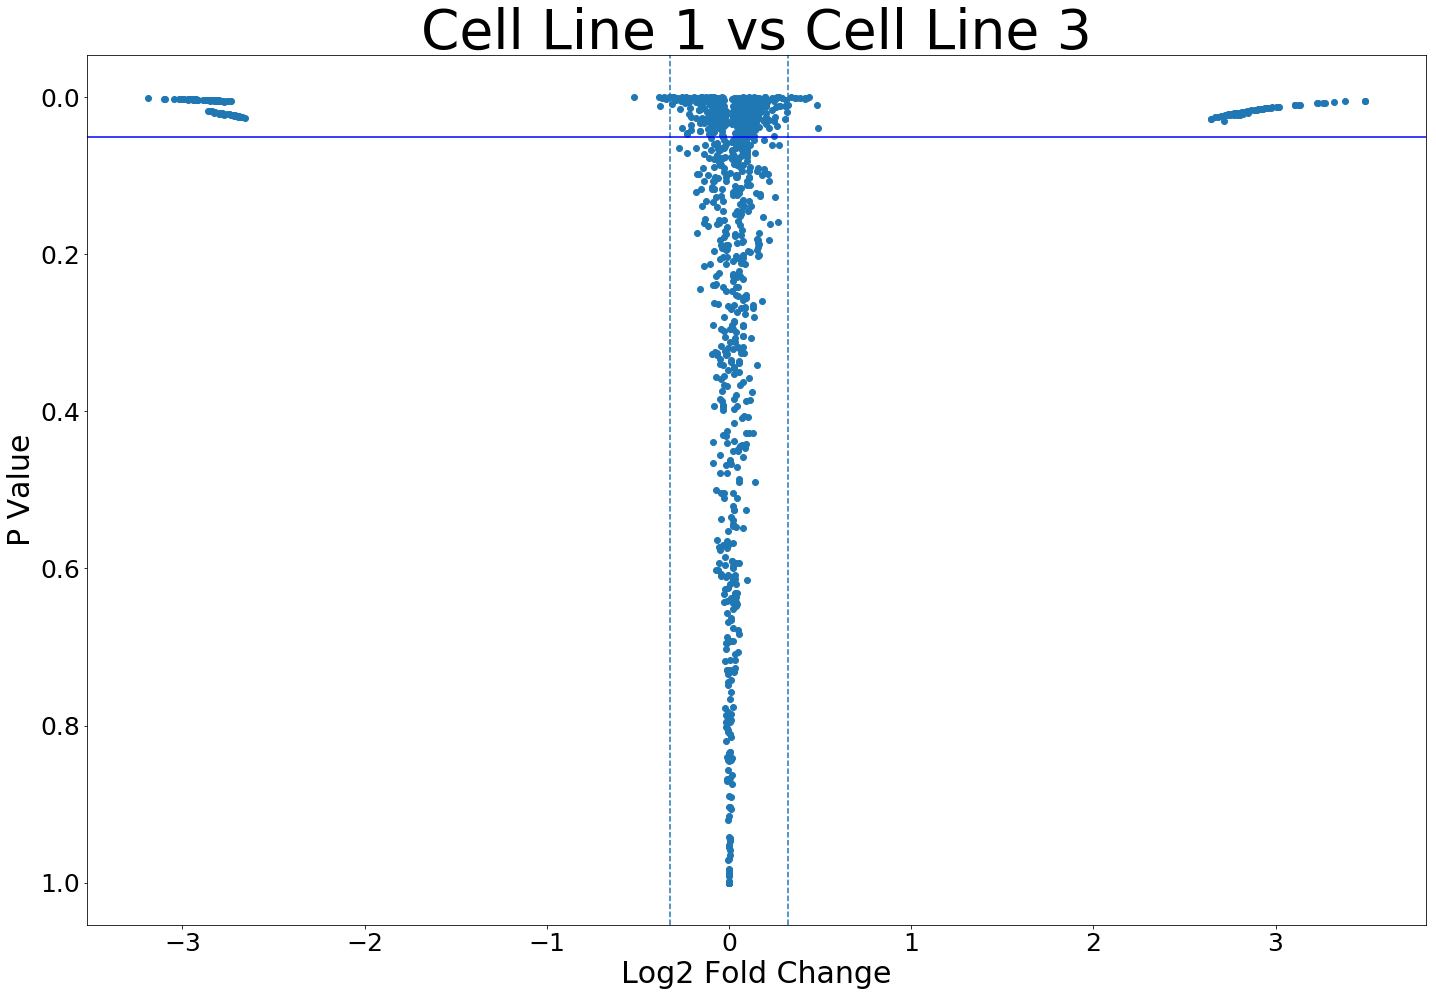

Using a 1.250 fold change threshold
176 proteins change significantly, out of 1436 (12.26%)
82 proteins are upregulated, out of 1436 (5.71%)
94 proteins are downregulated, out of 1436 (6.55%)



<Figure size 432x288 with 0 Axes>

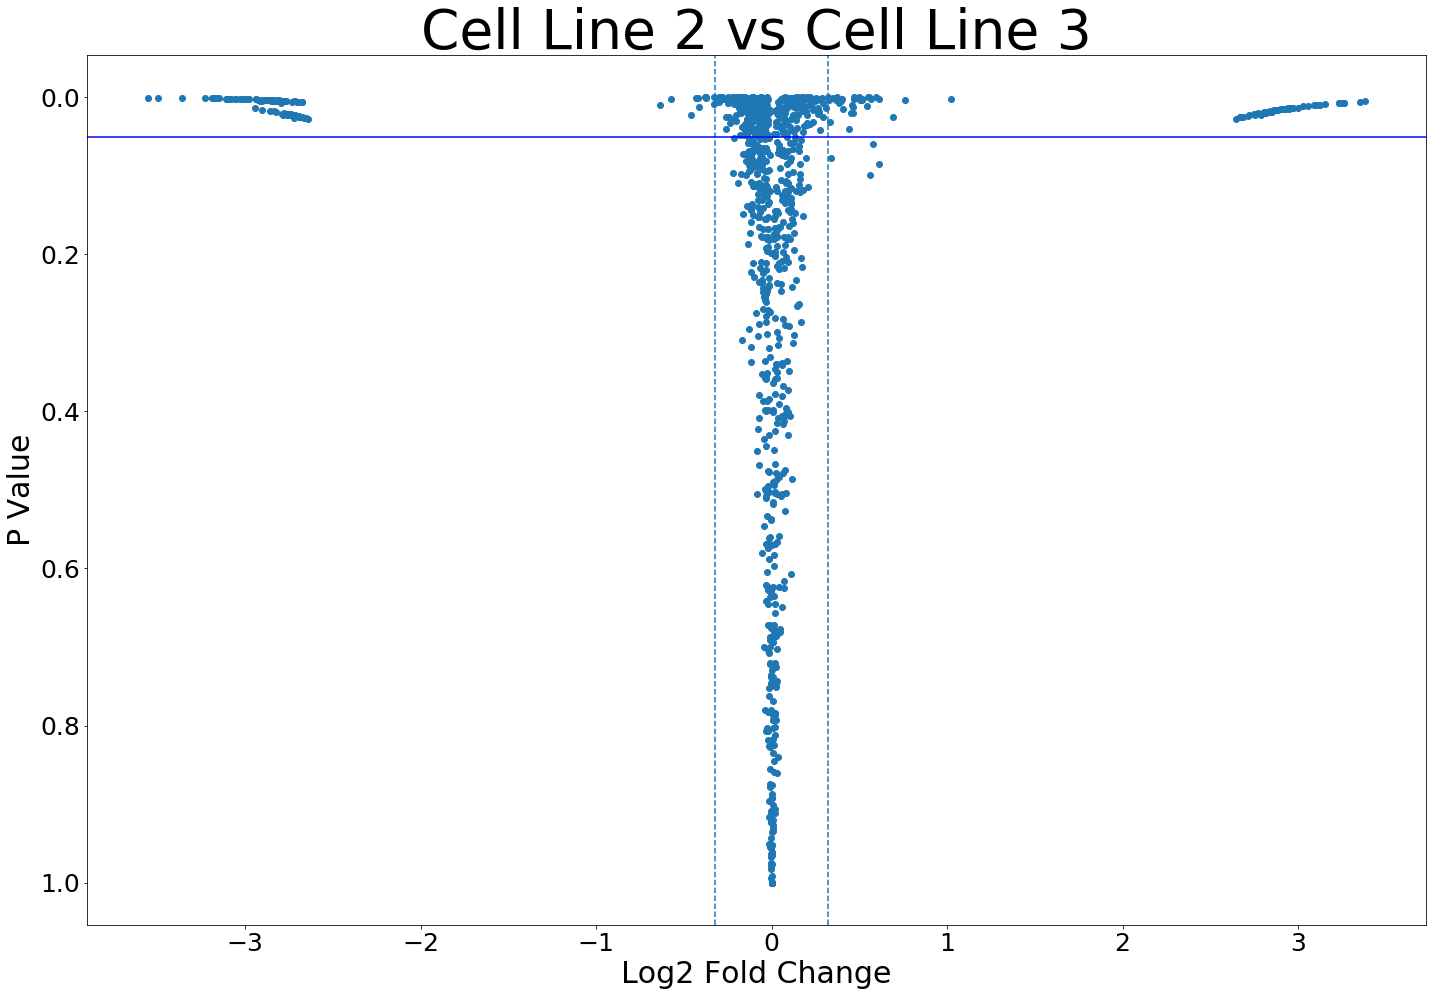

Using a 1.250 fold change threshold
208 proteins change significantly, out of 1436 (14.48%)
91 proteins are upregulated, out of 1436 (6.34%)
117 proteins are downregulated, out of 1436 (8.15%)


In [15]:
samples = by_sample(msdata_log, technical_replicates)
fc_v = get_t_stats(samples,#approxZero = neg_data["ave_zero_log"],
                  #min_threshold=neg_data["log_min_threshold_raw"],
                   report_cat=True)

graph_all_volcanoes(fc_v["fold_changes"], fc_v["t_stats"], 
                    list(technical_replicates.keys()),
                    #fold_change_threshold=fold_change_threshold,
                    fold_change_threshold=1.25,)